# Tema 5. Evaluación de algoritmos de clasificación.

## Acceder datos en google colab
Ejecuta esta celda **solo** si estas usando google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

## Ejemplo 5.1 Clasificación flores iris
Este es un ejemplo clásico en donde se clasifican tres generos distintos de la flor iris: **iris setosa**, **iris versicolor** y la **iris virginica** atendiendo a la longitud y anchura (en cm) tanto del sépalo como del pétalo.

Es un dataset clásico que viene ya incluido en `sklearn`.

### Cargamos los datos

In [ ]:
# cargamos el dataset y lo examinamos. El dataset es un diccionario y lo convertimos en un dataframe
d_iris = datasets.load_iris()
df_iris = pd.DataFrame(data=np.c_[d_iris['data'], d_iris['target']], columns=d_iris['feature_names']+['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
# test how many samples do we have
df_iris.shape

(150, 5)

### Añadimos la variable especie junto a la target

In [ ]:
# añadimos una columna con el nombre. Definimos una función que nombra la especie en función del target
def nombre_especie(target):
  if target == 0:
    return 'setosa'
  elif target == 1:
    return 'versicolor'
  elif target==2:
    return 'virginica'
  else:
    return 'unknown'

df_iris['especie'] = df_iris['target'].apply(nombre_especie)

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,especie
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


### Distribución de los datos

In [ ]:
# como estan los datos distribuidos
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# y como están las clases
# veremos que es un caso balanceado
df_iris.groupby('especie')['target'].count()

,target
especie,
setosa,50
versicolor,50
virginica,50


### Representación gráfica

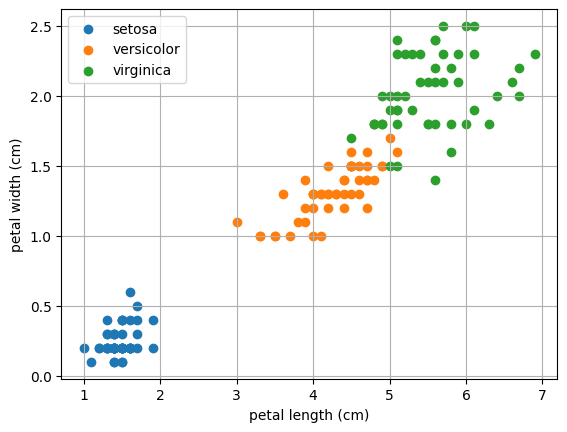

In [ ]:
fig, ax = plt.subplots()

# itera sobre los distintos tipos y haz el plot superpuesto
for i_especie in ['setosa', 'versicolor', 'virginica']:
  df_especie = df_iris[df_iris['especie']==i_especie]
  ax.scatter(x=df_especie['petal length (cm)'], y=df_especie['petal width (cm)'], label=i_especie)

ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')

ax.legend()
ax.grid()

### Dividimos el dataset en entrenamiento y test

In [ ]:
# tomamos las caracteristicas

X = df_iris.drop(['target', 'especie'], axis=1)
y = df_iris['target']

# dividimos en entrenamiento y test, al 50% de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42) # random_state para hacer los resultados reproducibles

### Implementamos clasificador

Usaremos una regresión logística, podríamos haber usado cualquier otro método.

In [ ]:
from sklearn.linear_model import LogisticRegression

# creamos el modelo con los valores por defecto
model_lr = LogisticRegression()

# ajustamos, o entrenamos
model_lr.fit(X_train, y_train)



LogisticRegression()

In [ ]:
# hagamos las predicciones sobre los datos de entrenamiento
y_pred = model_lr.predict(X_train)

for y, ypred in zip(y_train, y_pred):
  print(f"clase real: {y} predicha: {ypred} coinciden: {y==ypred}")


clase real: 1.0 predicha: 1.0 coinciden: True
clase real: 2.0 predicha: 2.0 coinciden: True
clase real: 1.0 predicha: 1.0 coinciden: True
clase real: 0.0 predicha: 0.0 coinciden: True
clase real: 1.0 predicha: 1.0 coinciden: True
clase real: 2.0 predicha: 2.0 coinciden: True
clase real: 0.0 predicha: 0.0 coinciden: True
clase real: 0.0 predicha: 0.0 coinciden: True
clase real: 1.0 predicha: 1.0 coinciden: True
clase real: 1.0 predicha: 2.0 coinciden: False
clase real: 0.0 predicha: 0.0 coinciden: True
clase real: 2.0 predicha: 2.0 coinciden: True
clase real: 0.0 predicha: 0.0 coinciden: True
clase real: 0.0 predicha: 0.0 coinciden: True
clase real: 1.0 predicha: 2.0 coinciden: False
clase real: 1.0 predicha: 1.0 coinciden: True
clase real: 2.0 predicha: 2.0 coinciden: True
clase real: 1.0 predicha: 2.0 coinciden: False
clase real: 2.0 predicha: 2.0 coinciden: True
clase real: 2.0 predicha: 2.0 coinciden: True
clase real: 1.0 predicha: 1.0 coinciden: True
clase real: 0.0 predicha: 0.0 c

## Ejemplo 5.2 Métricas clasificación

array([[21,  0,  0],
       [ 0, 24,  3],
       [ 0,  3, 24]])

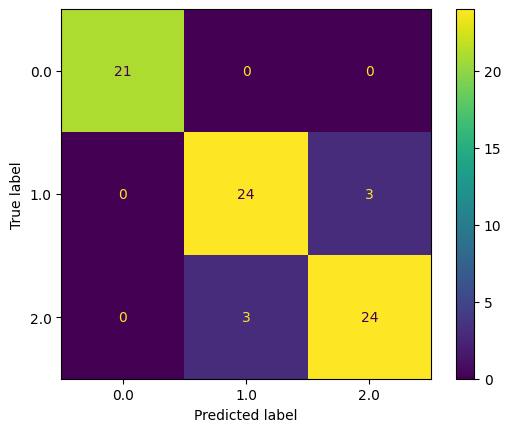

In [ ]:
from sklearn import metrics

# La matriz de confusión, gráficamente
metrics.ConfusionMatrixDisplay.from_predictions(y_train, y_pred)

# Sus valores
metrics.confusion_matrix(y_train, y_pred)

In [ ]:
# mostrar precision, recall y f1_score para cada clase. Exactitud total, para cada clase y ponderada.
print(metrics.classification_report(y_train, y_pred, digits=3))

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        21
         1.0      0.889     0.889     0.889        27
         2.0      0.889     0.889     0.889        27

    accuracy                          0.920        75
   macro avg      0.926     0.926     0.926        75
weighted avg      0.920     0.920     0.920        75



### Metricas en test

Para el conjunto de test

In [ ]:
y_pred_test = model_lr.predict(X_test)
print(metrics.classification_report(y_pred_test, y_test, digits=3))

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        29
         1.0      1.000     1.000     1.000        23
         2.0      1.000     1.000     1.000        23

    accuracy                          1.000        75
   macro avg      1.000     1.000     1.000        75
weighted avg      1.000     1.000     1.000        75



## Ejemplo 5.3 Curva RoC

In [ ]:
# Las predicciones son el número de la clase, pero podemos pedir que nos de la probabilidad de cada clase.
# en ese caso es un vector con cada dimensión una clase (setosa, versicolor, virgincia) con su probabilidad.
# la probabilidad mayor
y_prob_train = model_lr.predict_proba(X_train)

for y_prob, y_clas in zip(y_prob_train, y_pred):
  print(f"vector probabilidades: {y_prob} clase predicha (mayor probabilidad): {y_clas}")


vector probabilidades: [0.01548442 0.72043326 0.26408232] clase predicha (mayor probabilidad): 1.0
vector probabilidades: [1.99508783e-04 7.69785422e-02 9.22821949e-01] clase predicha (mayor probabilidad): 2.0
vector probabilidades: [0.0227868  0.91553277 0.06168043] clase predicha (mayor probabilidad): 1.0
vector probabilidades: [9.40785105e-01 5.92124519e-02 2.44323396e-06] clase predicha (mayor probabilidad): 0.0
vector probabilidades: [0.13056454 0.86223375 0.0072017 ] clase predicha (mayor probabilidad): 1.0
vector probabilidades: [2.95788530e-04 2.15723560e-01 7.83980652e-01] clase predicha (mayor probabilidad): 2.0
vector probabilidades: [9.54390001e-01 4.56092828e-02 7.16647146e-07] clase predicha (mayor probabilidad): 0.0
vector probabilidades: [9.64744444e-01 3.52552158e-02 3.40489329e-07] clase predicha (mayor probabilidad): 0.0
vector probabilidades: [0.04008745 0.93443454 0.025478  ] clase predicha (mayor probabilidad): 1.0
vector probabilidades: [0.00140204 0.4988999  0.4

In [ ]:
# Sklearn ya da la RoC
# pongamos para la segunda clase, virginica, en el entrenamiento, donde tiene errores
# si es virginica damos 1, si es cualquier otra (setosa o versicolor) ponemos 0
y_pred_setosa = []
for y in y_train:
  if y == 1: # virginica
    y_pred_setosa.append(1)
  else: # cualquier otra
    y_pred_setosa.append(0)

# toma las probabilidades de setosa
y_prob_setosa = y_prob_train[:,1]


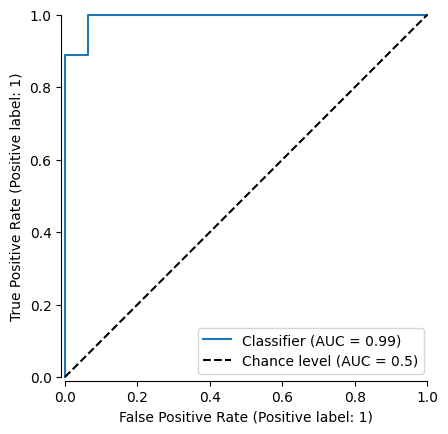

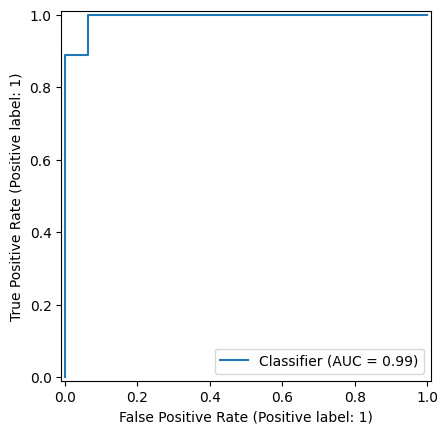

In [ ]:
# representa la ROC
display_roc = metrics.RocCurveDisplay.from_predictions(y_pred_setosa, y_prob_setosa, plot_chance_level=True, despine=True)
display_roc.plot()

In [ ]:
y_prob_setosa

array([0.72043326, 0.07697854, 0.91553277, 0.05921245, 0.86223375,
       0.21572356, 0.04560928, 0.03525522, 0.93443454, 0.4988999 ,
       0.06244522, 0.10426726, 0.0491601 , 0.05870038, 0.46860369,
       0.76637347, 0.05367583, 0.40878956, 0.24815327, 0.03078625,
       0.91019341, 0.04420243, 0.02063312, 0.52306307, 0.08325354,
       0.04987046, 0.04084919, 0.03311009, 0.61600426, 0.0418357 ,
       0.03100101, 0.11832197, 0.01325307, 0.03363922, 0.74020004,
       0.78157014, 0.50736791, 0.81397519, 0.10512126, 0.04161285,
       0.15195872, 0.85868136, 0.22867239, 0.91521833, 0.88195331,
       0.78109776, 0.07646128, 0.84904641, 0.86102171, 0.04492686,
       0.88959092, 0.04423353, 0.07264202, 0.04065356, 0.83896487,
       0.03263277, 0.18401737, 0.02988038, 0.05055714, 0.05799336,
       0.67916228, 0.06016546, 0.134799  , 0.9015585 , 0.17920422,
       0.88739777, 0.90532121, 0.28457246, 0.30081744, 0.09402025,
       0.92786587, 0.58045402, 0.02761963, 0.92975259, 0.05555